In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.datasets import load_boston
%matplotlib inline


In [0]:
boston=load_boston()

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target, columns=['Target'])
data=pd.concat([features,target],axis=1)

In [0]:
data2=data.corr('pearson')
abs(data2.loc['Target']).sort_values(ascending=False)

Target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [0]:
X=data['LSTAT']
Y=data['Target']

In [0]:
X=np.array(X/X.mean())
Y=np.array(Y/Y.mean())

In [0]:
n=int(0.8*len(X))


x_train=X[:n]
y_train=Y[:n]
x_test=X[n:]
y_test=Y[n:]

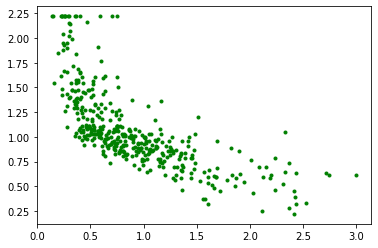

In [0]:
plt.plot(x_train,y_train,'g.')

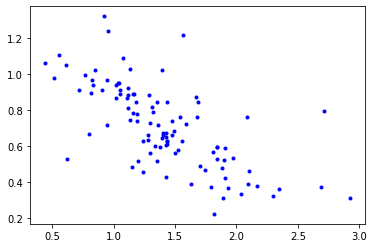

In [0]:
plt.plot(x_test,y_test,'b.')

In [0]:
def hypothesis(a,b,x):
  return a*x + b


In [0]:
def error(a,b,x,y):
  e=0
  m=len(y)
  for i in range(m):
    e+=np.power((hypothesis(a,b,x[i])-y[i]),2)

  return (1/(2*m))*e

In [0]:
def step_gradient(a,b,x,y,learning_rate):
 grad_a=0
 grad_b=0
 m=len(x)
 for i in range(m):
   grad_a +=1/m * (hypothesis(a,b,x[i]-y[i])*x[i])
   grad_b +=1/m * (hypothesis(a,b,x[i]-y[i]))
 a=a-(grad_a * learning_rate)
 b=b-(grad_b * learning_rate)

 return a,b

   

In [0]:
 def descend(initial_a,initial_b,x,y,learning_rate,iterations):
    a=initial_a
    b=initial_b
    for i in range(iterations):
       e=error(a,b,x,y)
       if i % 1000 == 0:
         print(f"error:{e},a:{a},b:{b}")
       a,b = step_gradient(a,b,x,y,learning_rate)
    return a,b

 

In [0]:
a=0
b=1
learning_rate=0.001
iterations=10000
final_a,final_b= descend (a,b,x_train,y_train,learning_rate,iterations)

error:0.08691047391394598,a:0,b:1
error:0.7185634532340691,a:-0.4687745091373329,b:0.33094474414707603
error:1.080634437679907,a:-0.48431859025202206,b:0.06654802819106118
error:1.0663724093363807,a:-0.371291424439531,b:-0.022377728445720474
error:0.9504876689857888,a:-0.25023601248465754,b:-0.04144511497161464
error:0.8443438106389621,a:-0.15629087501676306,b:-0.036657226051284714
error:0.7700782086010297,a:-0.09256570306914372,b:-0.026459979822080107
error:0.7232042380177983,a:-0.05259718971112017,b:-0.01724304676782663
error:0.6951629823234996,a:-0.028851394208358572,b:-0.010528510512912691
error:0.678985702296524,a:-0.015324362176829746,b:-0.006129398631561172


In [0]:
print(error(a,b,x_train,y_train))

0.08691047391394598


In [0]:
print(error(final_a,final_b,x_train,y_train))

0.669930427348359


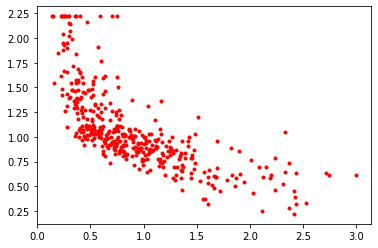

In [0]:
plt.plot(x_train,y_train,'r.')

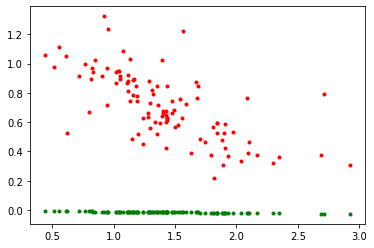

In [0]:
plt.plot(x_test,y_test,'r.',x_test,hypothesis(final_a,final_b,x_test),'g.')